# **Basic EDA Process**
- Export data to Dataframes
- The target (Y) is ``main_tag`` and the attributes (X) is the string combination of ``title`` and ``content``.
> [!IMPORTANT]
> RUN THIS FILE BEFORE RUN PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import sqlite3

db_file_path = "./dataset/articles.db" # remember to change

try:
    conn = sqlite3.connect(db_file_path)
    print(f"Successfully connected to the database: {db_file_path}")

    # SQL query
    sql_query = "SELECT * FROM articles"

    df = pd.read_sql_query(sql_query, conn)

    print("\nDataFrame head: ")
    print(df.head())

except sqlite3.Error as e:
    print(f"Error connecting to or querying the db: {e}")

finally:
    if 'conn' in locals() and conn:
        conn.close()
        print("Database connetion closed.")

Successfully connected to the database: ./dataset/articles.db

DataFrame head: 
                                                link        publication_date  \
0  https://thanhnien.vn/fam-co-dam-an-xoi-voi-fif...  04/11/2025 12:43 GMT+7   
1  https://thanhnien.vn/bao-quoc-te-len-tieng-vu-...  04/11/2025 12:25 GMT+7   
2  https://thanhnien.vn/uy-ban-doc-lap-malaysia-b...  04/11/2025 11:41 GMT+7   
3  https://thanhnien.vn/cuu-danh-thu-malaysia-keu...  04/11/2025 11:04 GMT+7   
4  https://thanhnien.vn/lo-dien-thoi-diem-afc-tru...  04/11/2025 09:05 GMT+7   

                                               title  \
0  FAM ‘cố đấm ăn xôi’ với FIFA tới cùng nhưng kh...   
1  Báo quốc tế lên tiếng vụ FIFA bác kháng cáo củ...   
2  Ủy ban độc lập Malaysia bị nghi ngờ tính minh ...   
3  Cựu danh thủ Malaysia kêu gọi FAM hãy yêu bóng...   
4  Lộ diện thời điểm AFC trừng phạt đội tuyển Mal...   

                                             content  main_tag      source  
0  Trưa 4.11, quyền Chủ t

In [2]:
df.shape

(20813, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20813 entries, 0 to 20812
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   link              20813 non-null  object
 1   publication_date  20777 non-null  object
 2   title             20777 non-null  object
 3   content           20813 non-null  object
 4   main_tag          20813 non-null  object
 5   source            20813 non-null  object
dtypes: object(6)
memory usage: 975.7+ KB


In [4]:
df.describe().T # statistical summary of the df (transpose) showing values like count, mean, standard deviation, ...

,count,unique,top,freq
link,20813,20813,https://thanhnien.vn/fam-co-dam-an-xoi-voi-fif...,1
publication_date,20777,19456,16/09/2025 08:00 GMT+7,7
title,20777,20755,Giá xăng dầu đồng loạt tăng,6
content,20813,20812,,2
main_tag,20813,7,Thể thao,3033
source,20813,1,Thanh Niên,20813


In [5]:
df.columns.tolist() # converts the column names into a Python list

['link', 'publication_date', 'title', 'content', 'main_tag', 'source']

In [6]:
# Checking for missing values
df.isnull().sum()
# => NEED TO PROCESS

link                 0
publication_date    36
title               36
content              0
main_tag             0
source               0
dtype: int64

In [7]:
# Remove the articles with null title and publication
print(f"The number of lines at the beginning: {len(df)}")

df_cleaned = df.dropna(subset=['title', 'publication_date'])

print(f"The number of lines after removal: {len(df_cleaned)}")
df = df_cleaned

df.isnull().sum()

The number of lines at the beginning: 20813
The number of lines after removal: 20777


link                0
publication_date    0
title               0
content             0
main_tag            0
source              0
dtype: int64

In [8]:
# Checking for the duplicates values
df.nunique() # The number of unique values in each column

link                20777
publication_date    19456
title               20755
content             20777
main_tag                7
source                  1
dtype: int64

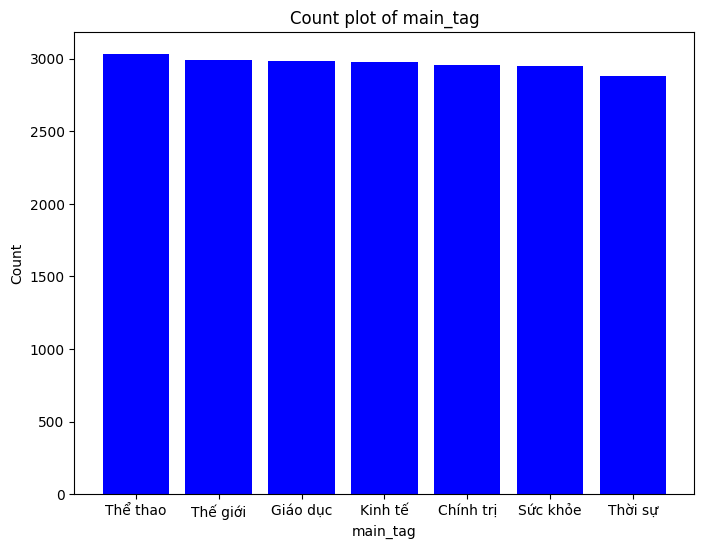

In [9]:
# Univariate analysis
main_tag_counts = df['main_tag'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(main_tag_counts.index, main_tag_counts, color='blue')
plt.title('Count plot of main_tag')
plt.xlabel('main_tag')
plt.ylabel('Count')
plt.show()

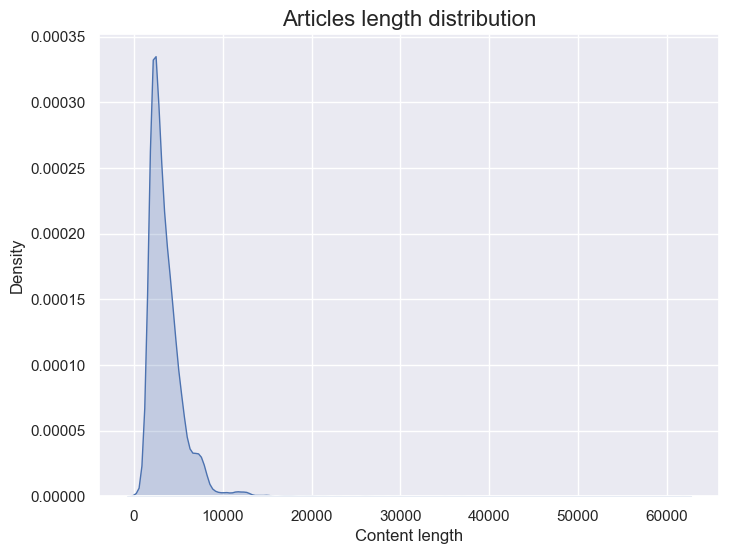

In [10]:
# KDA plot visualization for articles length
df['content_length'] = df['content'].str.len().fillna(0)

sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='content_length', fill=True)
plt.title("Articles length distribution", fontsize=16)
plt.xlabel('Content length', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

0        False
1        False
2        False
3        False
4        False
         ...  
20808    False
20809    False
20810    False
20811    False
20812    False
Name: content, Length: 20777, dtype: bool


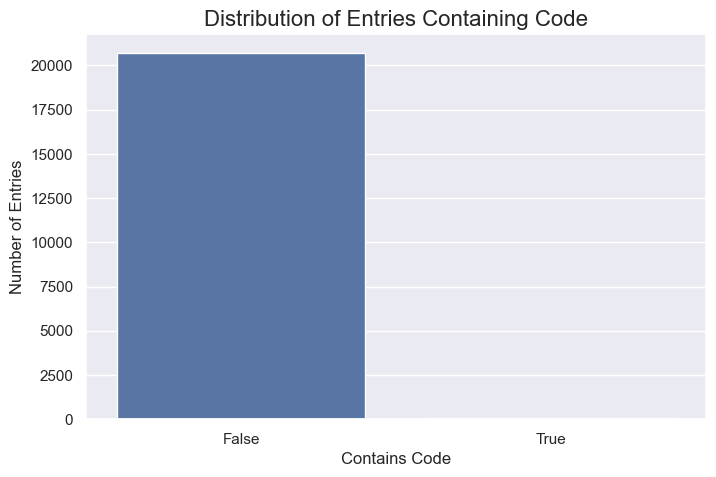

In [11]:
# check html/css/js
from bs4 import BeautifulSoup
import re

def contains_unwanted_code(text):
    if pd.isna(text):
        return False
    text = str(text)

    # Regex for common HTML tags (simple check)
    html_pattern = re.compile(r'<[^>]+>')
    if html_pattern.search(text):
        return True

    # Regex for common JavaScript keywords/patterns
    js_patterns = re.compile(r'script|javascript|onload|onclick|onerror', re.IGNORECASE)
    if js_patterns.search(text):
        return True

    # Regex for common CSS keywords/patterns
    css_patterns = re.compile(r'style|css|{|}|color|font-size|padding', re.IGNORECASE)
    if css_patterns.search(text):
        return True

    return False

has_code = df['content'].apply(contains_unwanted_code)

print(has_code)

plt.figure(figsize=(8, 5))

sns.countplot(x=has_code)

plt.title('Distribution of Entries Containing Code', fontsize=16)
plt.xlabel('Contains Code', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.show()

In [12]:
df.to_pickle('df_for_basic.pkl')
df.to_pickle('df_for_bert.pkl')

In [13]:
import pandas as pd
import textwrap

def print_demo_article(df):
    """
    Hàm chọn ngẫu nhiên 1 bài báo và in ra định dạng đẹp
    để so sánh Trước và Sau khi xử lý.
    """
    # 1. Lấy ngẫu nhiên 1 dòng
    sample = df.sample(1).iloc[0]

    # 2. Định nghĩa đường kẻ phân cách cho đẹp
    line = "=" * 60
    sub_line = "-" * 60

    print(line)
    print(f"DEMO KẾT QUẢ TIỀN XỬ LÝ DỮ LIỆU (MẪU NGẪU NHIÊN)")
    print(line)

    # --- PHẦN 1: THÔNG TIN METADATA ---
    print(f"1. THÔNG TIN CHUNG:")
    print(f"   - Tiêu đề:      {sample.get('title', 'N/A')}")
    print(f"   - Ngày đăng:    {sample.get('publication_date', 'N/A')}")
    print(f"   - Chuyên mục:   {sample.get('main_tag', 'N/A')} (Label ID: {sample.get('label_encoded', 'N/A')})")
    print(f"   - Link gốc:     {sample.get('link', 'N/A')}")
    print(sub_line)

    # --- PHẦN 2: SO SÁNH NỘI DUNG ---
    print(f"2. SO SÁNH QUY TRÌNH XỬ LÝ (Hiển thị 300 ký tự đầu):")
    
    # a. Nội dung gốc (nếu bạn còn giữ cột content gốc hoặc content_standardized)
    # Ưu tiên lấy content_standardized (đã chuẩn hóa Unicode), nếu không có lấy content thường
    raw_content = sample.get('content_standardized', sample.get('content', ''))
    print(f"\n[A] Dữ liệu thô (Raw/Standardized):")
    print(textwrap.fill(str(raw_content)[:300] + "...", width=80))

    # b. Nội dung làm sạch cơ bản (Lowercased + Stopwords removed - cho Basic Models)
    if 'content_final' in df.columns:
        print(f"\n[B] Dữ liệu sạch cho Basic Model (Lower + No Stopwords):")
        print(textwrap.fill(str(sample['content_final'])[:300] + "...", width=80))
    
    # c. Nội dung tách từ (Segmented - cho PhoBERT)
    if 'content_segmented' in df.columns:
        print(f"\n[C] Dữ liệu tách từ cho PhoBERT (Word Segmentation):")
        # In đậm các từ ghép (có dấu gạch dưới) để thầy dễ nhìn
        seg_text = str(sample['content_segmented'])[:300] + "..."
        print(textwrap.fill(seg_text, width=80))
        
        # Đếm thử số lượng từ ghép trong đoạn mẫu để chứng minh
        compound_words = [w for w in seg_text.split() if '_' in w]
        print(f"\n   -> Phát hiện {len(compound_words)} từ ghép trong đoạn mẫu (VD: {', '.join(compound_words[:3])}...)")

    print(line)

# --- CHẠY THỬ ---
# Gọi hàm này bất cứ khi nào bạn muốn xem 1 bài mới
print_demo_article(df)

DEMO KẾT QUẢ TIỀN XỬ LÝ DỮ LIỆU (MẪU NGẪU NHIÊN)
1. THÔNG TIN CHUNG:
   - Tiêu đề:      Rò rỉ kế hoạch hậu chiến Dải Gaza của Mỹ, Hamas phản bác
   - Ngày đăng:    02/09/2025 10:34 GMT+7
   - Chuyên mục:   Thế giới (Label ID: N/A)
   - Link gốc:     https://thanhnien.vn/ro-ri-ke-hoach-hau-chien-dai-gaza-cua-my-hamas-phan-bac-185250902100641437.htm
------------------------------------------------------------
2. SO SÁNH QUY TRÌNH XỬ LÝ (Hiển thị 300 ký tự đầu):

[A] Dữ liệu thô (Raw/Standardized):
Một bản kế hoạch hậu chiến cho Dải Gaza đang được chính quyền Tổng thống Mỹ
Donald Trump xem xét đã bị rò rỉ, trong đó Washington dự tính phát triển 'Gaza
Riviera' thành một chuỗi các siêu đô thị công nghệ cao.  Theo tờ Washington Post
ngày 1.9, bản kế hoạch nêu trên dài 38 trang, bao gồm việc "di d...
